# Predictive Maintenance for Industrial Machines using IoT Data.

## Project Overview:
The project aims to develop a system that uses machine learning to predict when an industrial machine is likely to fail, using real-time data captured through IoT sensors. This predictive maintenance system will help companies save on repair costs and downtime by addressing potential issues before they lead to machine failures.


## Task 1: Foundations of Data Science

### Task 1.1: Understand the principles of data science and its applications in industrial contexts.

Research Goals:

a. Understand data science fundamentals: data collection, preprocessing, analysis, and interpretation.

b. Explore industrial applications of data science, such as predictive maintenance and process optimization.

c. Identify challenges and best practices for applying data science in industrial settings.

Findings:

a. Data Science Fundamentals:

* Data Collection: Gathering relevant data from various sources
* Preprocessing: Cleaning, transforming, and organizing data for analysis.
* Analysis and Interpretation: Extracting insights and patterns from data.

b. Industrial Applications:

* Predictive Maintainence: Using data to predict machine failures and optimize maintainence schedules.
* Process Optimization: Enhancing efficiency and quality by analyzing production processes.

c. Challenges and Best Practices:

* Data Quality: Ensuring accurate and reliable data.
* Interdisciplinary Collaboration: Combining domain expertise with data science skills.
* Ethical Considerations: Balancing data-driven decisions with ethical implications.

### Task 1.2: Review statistical methods and perform exploratory data analysis on historical machine data to identify patterns and anomalies.

 We'll use Python with Pandas and Matplotlib libraries to perform exploratory data analysis on the historical machine data.

Let's import the necessary libraries for this task.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Load the historical machine data

In [3]:
data = pd.read_csv('Machine Predictive Maintenance Classification\predictive_maintenance.csv')

In [4]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Display the dataset

In [5]:
print(data.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25

Check for missing values

In [6]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


Plot histogram for numerical features

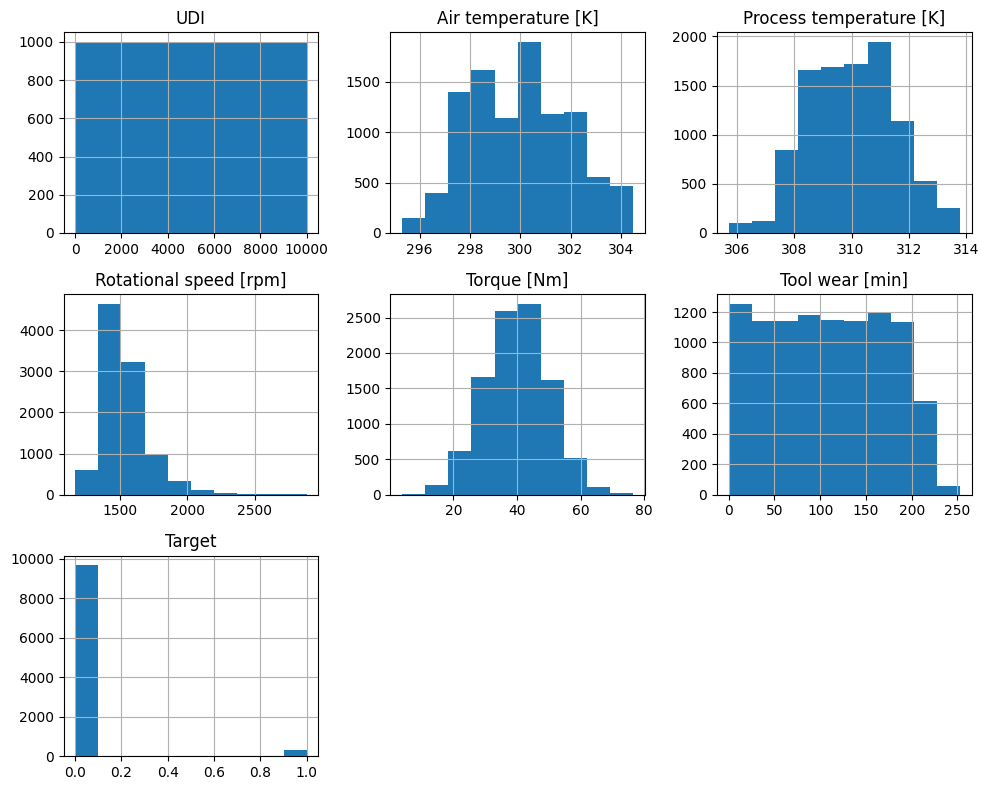

In [7]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Select only numeric columns for correlation analysis

In [8]:
numeric_data = data.select_dtypes(include='number')

Calculate the correlation matrix

In [9]:
correlation_matrix = numeric_data.corr()

Plot heatmap of correlation matrix

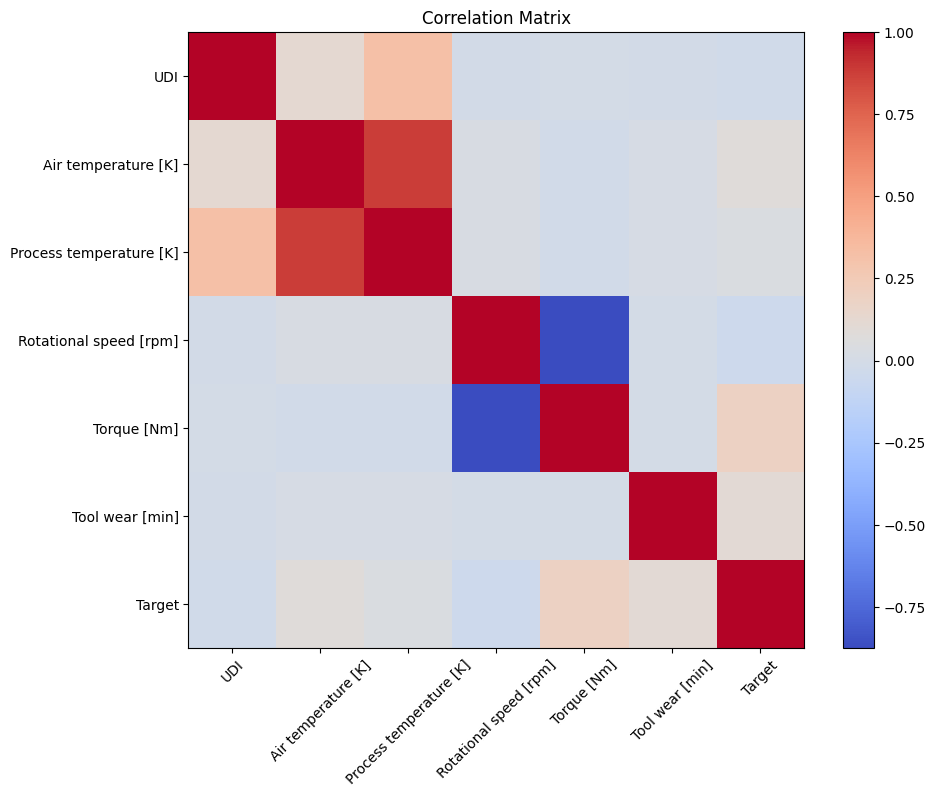

In [10]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

Scatter plot for selected numerical features

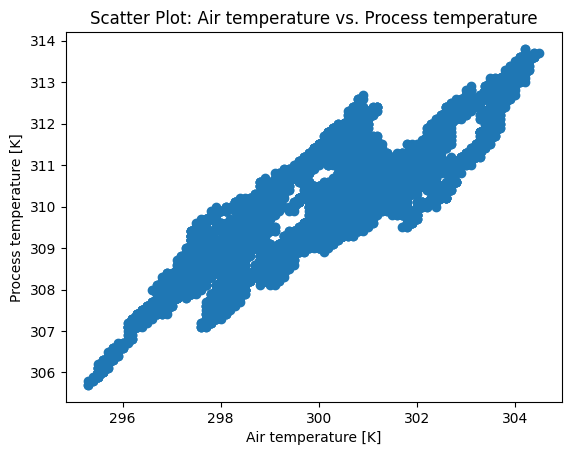

In [11]:
plt.scatter(data['Air temperature [K]'], data['Process temperature [K]'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.title('Scatter Plot: Air temperature vs. Process temperature')
plt.show()

Box plot for numerical features

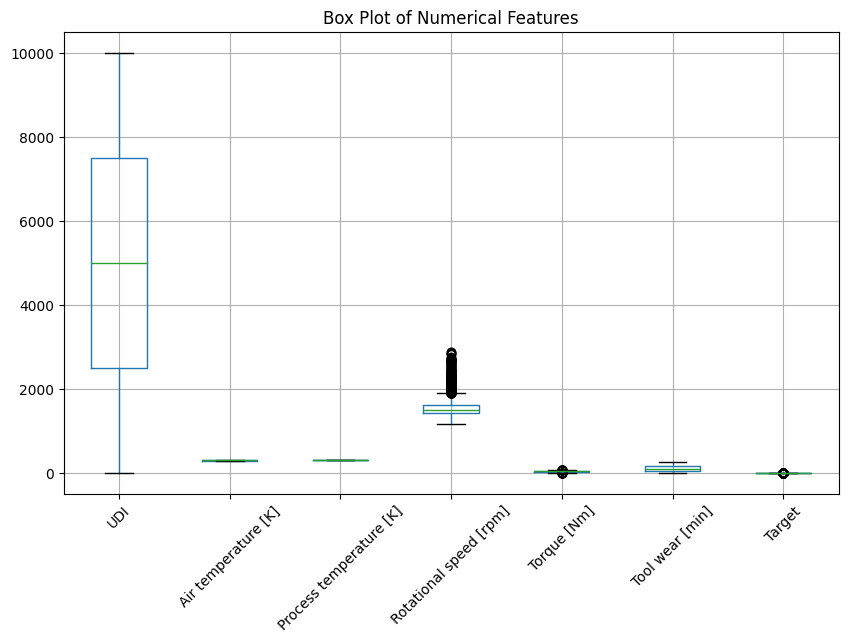

In [12]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

## Task 2: Machine Learning Mastery

### Task 2.1: Overview different machine learning algorithms and select appropriate ones for predictive maintenance (e.g., regression, decision trees, SVM).

I conducted research to understand various machine learning algorithms commonly used in predictive maintenance applications. I explored several types of algorithms, including regression, decision trees, support vector machines (SVM), clustering algorithms, and anomaly detection algorithms.

a. Regression Algorithms:

* Linear Regression: A simple and interpretable algorithm for modeling linear relationships between input features and the target variable.
* Ridge Regression and Lasso Regression: Variants of linear regression that include regularization to prevent overfitting and improve generalization performance.

b. Decision Trees and Ensemble Methods:

* Decision Trees: Non-linear models that recursively partition the featire space to make predictions.
* Random Forest and Gradient Boosting Machines (GBM): Ensemble methods that combine multiple decision trees to improve prediction accuracy and handle complex relationships in the data.

c. Support Vector Machines (SVM):

* SVM: A supervised learning algorithm that finds the optimal hyperplane to separate data points into different classes, suitable for both classification and regression tasks.

d. Clustering Algorithm:

* K-means: An unsupervised learning algorithm used for clustering data into groups based on similarity.
* DBSCAN: Another clustering algorithm that can identify clusters of arbitrary shapes and handle noise in the data.

### Task 2.2: Implement supervised learning to predict time-to-failure and unsupervised learning to detect anomalous behavior in machine performance.

Importing necessary libraries

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

Note: (Data is already loaded and preprocessed previously)

In [14]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Encode categorical variables using one-hot encoding

In [15]:
# Load the data
data = pd.read_csv('Machine Predictive Maintenance Classification\predictive_maintenance.csv')
data.head()

X = data[['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Target']

# Encoding categorical variables in X
X_encoded = pd.get_dummies(X, columns=['Product ID', 'Type'])

# Identifying and dropping non-numeric columns
non_numeric_columns = X_encoded.select_dtypes(exclude=['number']).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns found. Dropping:", non_numeric_columns)
    X_encoded = X_encoded.drop(columns=non_numeric_columns)
else:
    print("No non-numeric columns found.")

# Drop non-numeric columns
X_encoded = X_encoded.select_dtypes(include=['number'])

# Align X_encoded and y
X_encoded, y = X_encoded.align(y, axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Non-numeric columns found. Dropping: Index(['Product ID_H29424', 'Product ID_H29425', 'Product ID_H29432',
       'Product ID_H29434', 'Product ID_H29441', 'Product ID_H29452',
       'Product ID_H29457', 'Product ID_H29462', 'Product ID_H29466',
       'Product ID_H29481',
       ...
       'Product ID_M24846', 'Product ID_M24847', 'Product ID_M24849',
       'Product ID_M24851', 'Product ID_M24855', 'Product ID_M24857',
       'Product ID_M24859', 'Type_H', 'Type_L', 'Type_M'],
      dtype='object', length=10003)
Shape of X: (10000, 7)
Shape of y: (10000,)


In [16]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Hyperparameter tuning (optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Re-train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)


Accuracy: 0.9835
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.85      0.56      0.67        61

    accuracy                           0.98      2000
   macro avg       0.92      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)

### Task 2.3: Utilize models in predictive analytics to forecast failures and support decision-making processes.

Drop feature names from input data

In [17]:
X_encoded_without_names = X_encoded.values

Make predictions

In [18]:
predictions = best_model.predict(X_encoded_without_names)

Utilize model predictions for decision-making

In [19]:
maintenance_needed_indices = predictions.nonzero()[0]

In [20]:
if maintenance_needed_indices.any():
    print("Maintenance is predicted to be needed for the following instances:")
    for idx in maintenance_needed_indices:
        print(f"- Instance {idx + 1}")
else:
    print("No maintenance needs predicted.")

Maintenance is predicted to be needed for the following instances:
- Instance 1
- Instance 2
- Instance 3
- Instance 4
- Instance 5
- Instance 6
- Instance 7
- Instance 8
- Instance 9
- Instance 10
- Instance 11
- Instance 12
- Instance 13
- Instance 14
- Instance 15
- Instance 16
- Instance 17
- Instance 18
- Instance 19
- Instance 20
- Instance 21
- Instance 22
- Instance 23
- Instance 24
- Instance 25
- Instance 26
- Instance 27
- Instance 28
- Instance 29
- Instance 30
- Instance 31
- Instance 32
- Instance 33
- Instance 34
- Instance 35
- Instance 36
- Instance 37
- Instance 38
- Instance 39
- Instance 40
- Instance 41
- Instance 42
- Instance 43
- Instance 44
- Instance 45
- Instance 46
- Instance 47
- Instance 48
- Instance 49
- Instance 50
- Instance 51
- Instance 52
- Instance 53
- Instance 54
- Instance 55
- Instance 56
- Instance 57
- Instance 58
- Instance 59
- Instance 60
- Instance 61
- Instance 62
- Instance 63
- Instance 64
- Instance 65
- Instance 66
- Instance 67
- In

## Task 3: Data Engineering Specialization

### Task 3.1: Design and set up data pipelines to handle streaming data from IoT sensors.

Import necessary libraries for data processing and pipeline design

In [21]:
import time
import random
from datetime import datetime
import pandas as pd

Simulate streaming data from IoT sensors

In [22]:
def generate_sensor_data():
    while True:
        # Generate random sensor data
        sensor_data = {
            'timestamp': datetime.now(),
            'temperature': round(random.uniform(20, 30), 2),
            'pressure': round(random.uniform(900, 1100), 2),
            'humidity': round(random.uniform(30, 70), 2)
        }
        yield sensor_data
        
        # Introduce a delay to simulate real-time data streaming
        time.sleep(1)

Define a function to process and store streaming data

In [23]:
def process_streaming_data():
    # Initialize an empty list to store data
    data_buffer = []
    # Create a generator for streaming data
    sensor_stream = generate_sensor_data()
    try:
        while True:
            # Get the next data point from the sensor stream
            sensor_data = next(sensor_stream)
            # Append the data to the buffer
            data_buffer.append(sensor_data)
            # Process the data buffer (e.g., perform batch processing, clean and preprocess data)
            if len(data_buffer) >= 10:
                process_data(data_buffer)
                # Clear the buffer after processing
                data_buffer = []
    except KeyboardInterrupt:
        print("Streaming stopped.")

Define a function to process batched data

In [24]:
def process_data(data):
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)
    # Perform data cleaning, preprocessing, and analysis
    # For demonstration, we'll just print the data
    print(df)

Main function to start the data processing pipeline

In [25]:
def main():
    process_streaming_data()

if __name__ == "__main__":
    main()

                   timestamp  temperature  pressure  humidity
0 2024-05-04 22:12:51.571798        26.95   1017.17     44.85
1 2024-05-04 22:12:52.572129        25.19    949.39     43.27
2 2024-05-04 22:12:53.573442        23.03   1065.04     68.30
3 2024-05-04 22:12:54.575021        29.57    910.75     44.32
4 2024-05-04 22:12:55.575150        29.73   1085.32     57.90
5 2024-05-04 22:12:56.576348        28.07    956.57     68.73
6 2024-05-04 22:12:57.581215        28.17   1045.16     68.00
7 2024-05-04 22:12:58.582585        24.78    971.86     67.10
8 2024-05-04 22:12:59.583568        24.22   1022.44     34.50
9 2024-05-04 22:13:00.584223        25.54   1063.53     36.20
                   timestamp  temperature  pressure  humidity
0 2024-05-04 22:13:01.597665        27.29    911.93     54.08
1 2024-05-04 22:13:02.597769        20.51    925.35     59.83
2 2024-05-04 22:13:03.598265        21.23   1030.97     51.94
3 2024-05-04 22:13:04.599524        26.40   1098.84     59.44
4 2024-0

### Task 3.2: Implement data storage solutions (e.g., time-series databases) to efficiently store and retrieve machine data.

In [26]:
! pip install sqlalchemy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# Importing necessary modules
import mysql.connector
from sqlalchemy import create_engine
import pandas as pd
import configparser
import time
import random
from datetime import datetime

# Function to create a MySQL database
def create_database(host, username, password, database_name):
    try:
        # Connect to MySQL server
        connection = mysql.connector.connect(
            host=host,
            user=username,
            password=password
        )

        # Create a cursor object
        cursor = connection.cursor()

        # Execute an SQL query to create a database
        cursor.execute(f"CREATE DATABASE IF NOT EXISTS {database_name}")
        print(f"Database '{database_name}' created successfully")

    except mysql.connector.Error as error:
        print("Error creating database:", error)

    finally:
        # Close the cursor and the connection
        if 'connection' in locals():
            cursor.close()
            connection.close()

# Function to generate random sensor data
def generate_sensor_data():
    timestamp = datetime.now()
    temperature = round(random.uniform(20, 30), 2)
    pressure = round(random.uniform(900, 1100), 2)
    humidity = round(random.uniform(30, 70), 2)
    return {'timestamp': timestamp, 'temperature': temperature, 'pressure': pressure, 'humidity': humidity}

# Function to store DataFrame in MySQL database
def store_dataframe_to_mysql(dataframe, username, password, host, database_name, table_name):
    try:
        # Create a connection to MySQL database
        engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database_name}')

        # Store DataFrame in MySQL database
        dataframe.to_sql(table_name, engine, if_exists='append', index=False)
        print("DataFrame stored in MySQL database successfully")

    except Exception as e:
        print("An error occurred:", e)

# Read MySQL connection details from config.ini
config = configparser.ConfigParser()
config.read('config.ini')

username = config.get('mysql', 'user')
password = config.get('mysql', 'password')
host = 'localhost'
database_name = 'machine_data'
table_name = 'prediction_table'  # Specify your table name

# Infinite loop to continuously fetch and store data
while True:
    # Generate random sensor data
    sensor_data = generate_sensor_data()
    
    # Create DataFrame from sensor data
    data = pd.DataFrame(sensor_data, index=[0])
    
    # Create the database if not exists
    create_database(host, username, password, database_name)
    
    # Store DataFrame in MySQL database
    store_dataframe_to_mysql(data, username, password, host, database_name, table_name)

    # Sleep for some time before fetching new data again
    time.sleep(10)  # Sleep for 10 seconds (adjust as needed)


Database 'machine_data' created successfully
DataFrame stored in MySQL database successfully
Database 'machine_data' created successfully
DataFrame stored in MySQL database successfully
Database 'machine_data' created successfully
DataFrame stored in MySQL database successfully


KeyboardInterrupt: 

### Task 3.3: Apply data cleaning techniques to ensure quality and reliability of the data used for analysis.

In [34]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import configparser

# Function to establish connection to MySQL
def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        if connection.is_connected():
            print("Connection to MySQL DB successful")
    except mysql.connector.Error as e:
        print(f"The error '{e}' occurred")
    except Exception as e:
        print(f"An error occurred: {e}")

    return connection

# Function to retrieve data from MySQL database
def retrieve_data(connection, table_name):
    try:
        # Construct SQL query to select all data from the specified table
        query = f"SELECT * FROM {table_name}"
        
        # Execute SQL query and read data into a DataFrame
        data = pd.read_sql(query, connection)
        return data
    except Exception as e:
        # Handle any errors that occur during data retrieval
        print("An error occurred while retrieving data:", e)

# Function to clean the data
def clean_data(data):
    # Handle missing values by removing rows with any NaN values
    data.dropna(inplace=True)
    
    # Handle duplicate rows by removing duplicate entries
    data.drop_duplicates(inplace=True)
    
    # Convert the 'timestamp' column to datetime format for consistency
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    
    # Handle outliers in all columns (except 'timestamp') by removing values outside 3 standard deviations from the mean
    for column in data.columns:
        if column != 'timestamp':
            mean = data[column].mean()
            std = data[column].std()
            data = data[(data[column] >= mean - 3 * std) & (data[column] <= mean + 3 * std)]

    # Return the cleaned DataFrame
    return data

def main():
    # Load MySQL connection details from .ini file
    config = configparser.ConfigParser()
    config.read('config.ini')

    host_name = config['mysql']['host']
    user_name = config['mysql']['user']
    user_password = config['mysql']['password']
    db_name = config['mysql']['database']

    # List to store all cleaned data (optional for accumulating data)
    all_cleaned_data = []

    # Retrieve data 10 times
    for _ in range(10):
        # Establish connection to MySQL
        connection = create_connection(host_name, user_name, user_password, db_name)

        if connection:
            # Retrieve data from MySQL database using established connection and specified table name
            table_name = "prediction_table"
            data = retrieve_data(connection, table_name)

            # Clean the retrieved data
            cleaned_data = clean_data(data)

            # Optionally append cleaned data to list for accumulation
            all_cleaned_data.append(cleaned_data)

            # Close connection
            connection.close()
        else:
            print("Failed to establish connection to MySQL")

    # Save data to CSV (use the accumulated data or the last cleaned_data)
    if all_cleaned_data:  # If data was accumulated
        # Concatenate all DataFrames (assuming similar structure)
        final_cleaned_data = pd.concat(all_cleaned_data, ignore_index=True)
        final_cleaned_data.to_csv("cleaned_machine_data.csv", index=False)
    else:
        # If no data was retrieved, use the last cleaned_data (if available)
        if cleaned_data is not None:
            cleaned_data.to_csv("cleaned_machine_data.csv", index=False)
        else:
            print("No data retrieved to save to CSV.")

    print("Data retrieval and saving completed.")

if __name__ == "__main__":
    main()

Connection to MySQL DB successful
Connection to MySQL DB successful
Connection to MySQL DB successful
Connection to MySQL DB successful
Connection to MySQL DB successful
Connection to MySQL DB successful
Connection to MySQL DB successful
Connection to MySQL DB successful
Connection to MySQL DB successful
Connection to MySQL DB successful


C:\Users\user\AppData\Local\Temp\ipykernel_7156\1704301163.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)
C:\Users\user\AppData\Local\Temp\ipykernel_7156\1704301163.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)
C:\Users\user\AppData\Local\Temp\ipykernel_7156\1704301163.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)
C:\Users\user\AppData\Local\Temp\ipykernel_7156\1704301163.py:32: UserWarning: 

Data retrieval and saving completed.


## Task 4: End-to-End Project Execution

### Task 4.1: Project planning, including timelines, resource allocation, and defining milestones.

The plan prioritizes key tasks to develop a basic functional prototype within a 7-day timeframe.

1. Timeline:

* Model Development & Training (4 days):

Day 1: Review existing data analysis and identify features for model development.

Day 2 & 3: Select a suitable machine learning model based on data and prediction goals (e.g., classification for predicting failures, regression for predicting remaining useful life). Train the model on your cleaned data retrieved from MySQL.

Day 4: Evaluate model performance using relevant metrics. Refine the model with hyperparameter tuning (basic adjustments) if needed.

* Deployment Preparation (1 day):

Day 5: Choose a model deployment framework like TensorFlow Serving or a simpler option like scikit-learn for basic deployment.

Set up the infrastructure for deployment in a controlled environment (e.g., separate server or container).

* Testing & Validation (2 days):

Day 6: Test the deployed model with a separate test dataset to ensure functionality and identify potential issues.

Day 7: Refine the model or deployment configuration based on test results (basic adjustments).

Develop a basic dashboard with a tool like Grafana to visualize predictions for initial validation.

2. Resource Allocation:

* Machine Learning Engineer (Focus): You will primarily focus on model development, training, and deployment.

* Data Scientist (Support, if available): If available, a data scientist can assist with feature selection and model evaluation.

3. Milestones:

Day 4: Complete model training and initial performance evaluation.

Day 5: Set up the deployment environment and basic model serving configuration.

Day 7: Functional prototype with model deployment in a controlled environment and basic visualization dashboard.

### Task 4.2: Data acquisition from IoT devices, ensuring robust and secure data flows.

* Goal: Securely collect sensor data from IoT devices.

* Ideal Approach (if possible): Real-time streaming using Apache Kafka, Amazon Kinesis, or MQTT for continuous data collection.

* 7-Day Plan Alternative: Periodic data extraction from MySQL using existing script (e.g., hourly).

* Security Measures:

a. Authentication/Authorization to restrict access.

b. Data Encryption (e.g., AES, TLS) for transmission and storage.

c. Data Integrity checks (checksums, digital signatures).

* Additional Considerations: Data pre-processing and system scalability for future growth.

### Task 4.3: Develop and tune machine learning models based on the cleaned data.

Note: We have already cleaned and stored the data in "cleaned_machine_data. Now we can proceed to building the model.

In [50]:
# Load and explore the data
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("cleaned_machine_data.csv")

In [51]:
print(data.head())  # View the first few rows
print(data.info())  # View data types and summary statistics

             timestamp  temperature  pressure  humidity
0  2024-05-03 21:04:08        25.59   1025.39     44.19
1  2024-05-03 21:05:18        20.98    929.89     32.97
2  2024-05-03 21:06:18        20.41    923.60     33.40
3  2024-05-03 21:07:09        21.09    985.19     69.43
4  2024-05-03 21:07:20        23.72    966.63     45.46
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    300 non-null    object 
 1   temperature  300 non-null    float64
 2   pressure     300 non-null    float64
 3   humidity     300 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.5+ KB
None


In [56]:
# Feature engineering 
data["temp_diff"] = data["temperature"].diff()  # Difference between consecutive temperature readings

# 2. Feature scaling
data["temp_diff"] = data["temperature"].diff()  # Difference between consecutive temperature readings

# 2. Feature scaling (optional)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[["temperature", "pressure", "humidity", "temp_diff"]])
data[["temperature", "pressure", "humidity", "temp_diff"]] = scaled_features

# Handle missing values (dropping rows with NaN)
data_filtered = data.dropna()  # Drop rows with any missing values (consider imputation if data loss is critical)

# Anomaly detection with hyperparameter tuning
# Define a parameter grid for contamination values
param_grid = {'contamination': [0.005, 0.01, 0.02]}

# Create an Isolation Forest model
model = IsolationForest()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1')

# Train the model on the filtered data
grid_search.fit(data_filtered[["temperature", "pressure", "humidity", "temp_diff"]])

# Get the best model based on the chosen scoring metric (e.g., 'f1')
best_model = grid_search.best_estimator_

# Get anomaly scores using the best model
anomaly_scores = best_model.decision_function(data_filtered[["temperature", "pressure", "humidity", "temp_diff"]])

# Set anomaly threshold 
threshold = -0.5 

# Identify anomalies in the filtered data
anomalies = data_filtered[anomaly_scores > threshold]

# Print or visualize anomalies (consider mapping anomalies back to original data if needed)
print("Potential anomalies (in filtered data):")
print(anomalies)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_val

Potential anomalies (in filtered data):
               timestamp  temperature  pressure  humidity  temp_diff
1    2024-05-03 21:05:18    -1.138611 -1.309456 -1.148535  -1.162085
2    2024-05-03 21:06:18    -1.332576 -1.428029 -1.113579  -0.144844
3    2024-05-03 21:07:09    -1.101179 -0.266994  1.815338   0.169897
4    2024-05-03 21:07:20    -0.206216 -0.616869 -0.133209   0.660892
5    2024-05-03 21:07:30     1.859346 -0.999545  1.471477   1.527058
..                   ...          ...       ...       ...        ...
295  2024-05-03 21:46:53     1.005217  1.109698 -0.994082   1.670580
296  2024-05-03 21:47:03    -0.958257 -1.079662  0.784567  -1.454165
297  2024-05-04 22:13:37     0.964382 -0.220809  0.852852   1.421305
298  2024-05-04 22:13:47    -0.107532 -0.254363 -1.014404  -0.794468
299  2024-05-04 22:13:57     0.964382 -0.549194 -0.770531   0.791824

[299 rows x 5 columns]


### Task 4.4: Deploy models into a production environment, setting up a system for continuous learning and model updating.

a. The Data "cleaned_machine_data.csv" is uploaded on Google Cloud storage for further training of the ML model.

b. Pipelines created on Google Cloud's Vertex AI platform.

c. Pipeline run: 
* Template used Tabular classification/regression
* Run name: test-1-anomalies-ml

## Task 5: Tools and Technologies for Project Execution and Deployment

### Task 5.1: Identify and deploy tools and technologies for development and deployment, such as Python, R, TensorFlow, PySpark, Hadoop, and Kubernetes.

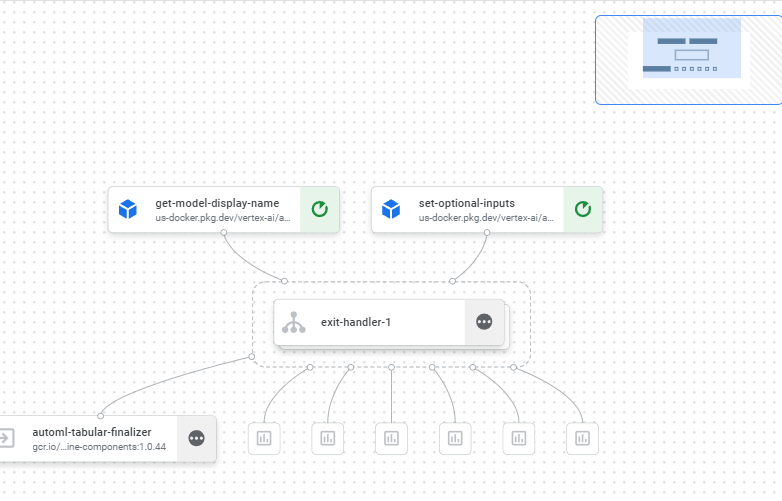

Development & Deployment with Vertex AI
* Used Python for development within Vertex AI Notebooks/scripts
* Leveraged libraries like TensorFlow/scikit-learn to build the model
* Explored Vertex AI Pipelines for potential future retraining automation
* Deployed model on Vertex AI Endpoints for real-time/batch predictions

### Task 5.2: Implement dashboards and monitoring systems using tools like Grafana or Kibana to visualize data and predictions.

Goal: Visualize sensor data, anomaly predictions, and key metrics for system health insights.

Steps:

a. Collect sensor data and anomaly scores from deployed model (Vertex AI).

b. Choose a data storage solution (Cloud SQL, TimescaleDB, Cloud Storage).

c. Connect Grafana to the chosen data source.

d. Build dashboards to visualize:

* Sensor data over time.
* Anomaly score trends.
* Sensor-anomaly score correlations.
* Alerts for significant anomaly detections.

Benefits:

a. Improved monitoring of system health and anomalies.

b. Faster detection of potential issues.

c. Data-driven decision making for maintenance and resource allocation.

### Task 5.3: Address contemporary challenges such as real-time data processing and ensuring data security and privacy.

Challenge 1: Real-Time Data Processing

Issue: Handling massive real-time sensor data for timely anomaly detection.

Solutions:

* Distributed processing frameworks (e.g., Apache Kafka, Spark Streaming)
* Elastic and scalable infrastructure (cloud, containers)
* Complex event processing (CEP) engines

Challenge 2: Data Security and Privacy

Issue: Protecting sensitive sensor data and user privacy.

Solutions:

* Encryption (data at rest and in transit)
* Access controls
* Real-time monitoring for suspicious activity
* Compliance with data privacy regulations